#### 1. California Housing 데이터셋 load

In [43]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 데이터 불러오기
data = fetch_california_housing(as_frame=True)

# 데이터와 타겟을 하나의 데이터프레임으로 결합
housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df['target'] = data.target
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2. 산점도 그래프 통한 상관관계 관계 탐색

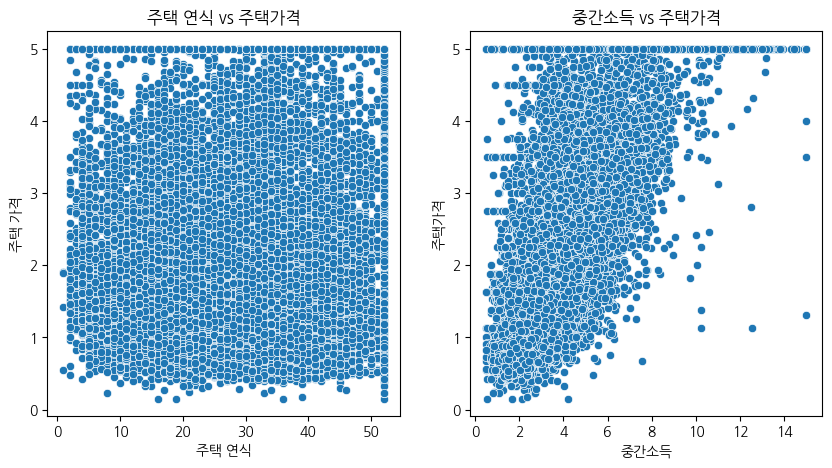

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용: 'NanumGothic' 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결

fig, ax = plt.subplots(1,2, figsize=(10,5))

# HousingAge와 target 사이의 관계
sns.scatterplot(x=housing_df['HouseAge'], y=housing_df['target'], ax=ax[0])
ax[0].set_title('주택 연식 vs 주택가격')
ax[0].set_xlabel('주택 연식')
ax[0].set_ylabel('주택 가격')


# MedInc와 target 사이의 관계
sns.scatterplot(x=housing_df['MedInc'], y=housing_df['target'], ax=ax[1])
ax[1].set_title('중간소득 vs 주택가격')
ax[1].set_xlabel('중간소득')
ax[1].set_ylabel('주택가격')
plt.show()

#### 3. 빈도 기반으로 범주화하기 (Quantile-based Binning) - qcut
###### [문제]
###### 주택 데이터 세트의 'HouseAge' 열을 사용하여 데이터를 탐색하고 분석해 봅시다.
###### 목표는 'HouseAge' 열의 데이터를 동일한 빈도를 가지는 여섯 개의 범주로 나누어 새로운 범주형 변수 'HouseAge_cat'를 생성하는 것입니다.
###### 이를 위해 pandas의 'qcut' 함수를 사용할 것입니다. 
###### 각 범주가 유사한 수의 관측치를 가지도록 분할하여, 'HouseAge'의 분포를 6개로 균등 하게 나타내는 새로운 범주형 변수를 만들어봅시다.

In [45]:
# 등빈도 Binning
housing_df['HouseAge_cat'] = pd.qcut(housing_df['HouseAge'], q=6)

# 생성된 범주 확인
HouseAge_cat = housing_df['HouseAge_cat'].value_counts().sort_index()
HouseAge_cat

HouseAge_cat
(0.999, 16.0]    4058
(16.0, 22.0]     3080
(22.0, 29.0]     3531
(29.0, 35.0]     3627
(35.0, 42.0]     3130
(42.0, 52.0]     3214
Name: count, dtype: int64

#### 4. Binning 통해 생성된 변수 시각화
###### Binning을 통해 새롭게 생성한 범주형 변수는 시각화를 통하여, 적절한 범주의 갯수나 값을 찾아 의미 있는 패턴을 발견하려고 하는 시도를 해야 합니다.'HouseAge_cat'과 주택 가격간의 관계를 seaborn의 boxplot함수를 통해서 시각화 해봅시다. 시각화 한 그래프를 통해 연속형 변수 ''HouseAge'에서는 찾을 수 없었던 숨겨진 패턴이 있는지 확인해 보세요.

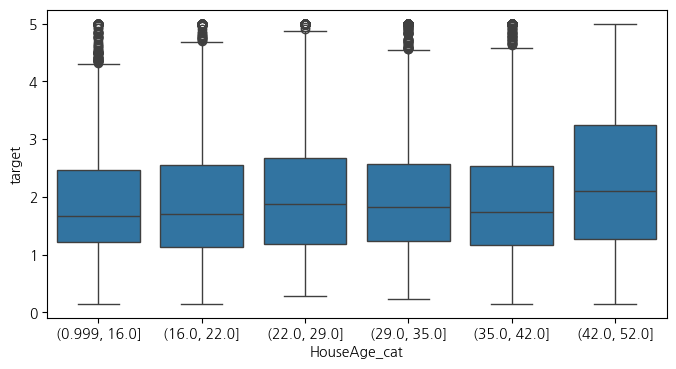

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))

sns.boxplot(x='HouseAge_cat', y='target', data=housing_df, ax=ax)

plt.show()

#### 5. 값 기반으로 범주화하기 (Value-based Binning) - cut
###### 앞서 빈도수 기반으로 나눈 범주에서 첫 번째와 두 번째 범주의 범위가 유사함을 확인했습니다.이제 이 두 범주를 결합하여 값 기반으로 5개의 새로운 범주를 정의하고, 'HouseAge_cat2'라는 새로운 범주형 변수를 생성해 보겠습니다. 이 과정에서는 pandas의 cut 함수를 사용할 것이며, 생성된 범주형 변수를 seaborn의 boxplot으로 시각화하여 각 범주별 분포를 분석해 보겠습니다.

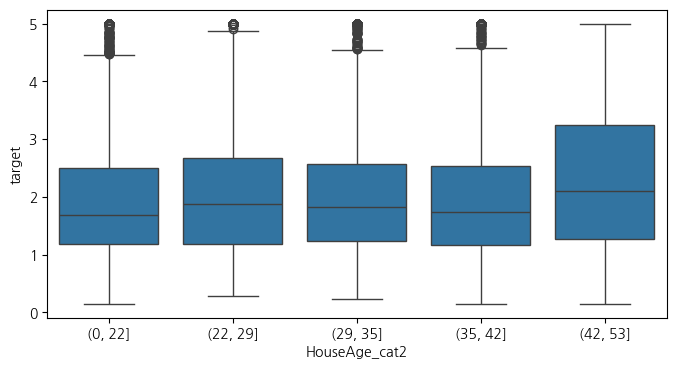

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0,22,29,35,42,53]

housing_df['HouseAge_cat2'] = pd.cut(housing_df['HouseAge'], bins=bins)
HouseAge_cat2 = housing_df['HouseAge_cat2'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x='HouseAge_cat2', y='target', data=housing_df, ax=ax)
plt.show()